# Delitos mensuales
1. Descargar archivo .zip de https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published
2. Descomprimirlo y poner esta libreta junto a los archivos generados

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [12]:
# probando con un solo año
año = 2019
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
         'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
deli = pd.read_excel("delitos_data/Municipal-Delitos-2015-2019/" + str(año) + ".xlsx")
homicidios = deli[deli['Tipo de delito']=='Homicidio']
suma = homicidios[meses].sum()
suma

Enero         3666.0
Febrero       3569.0
Marzo         3766.0
Abril            0.0
Mayo             0.0
Junio            0.0
Julio            0.0
Agosto           0.0
Septiembre       0.0
Octubre          0.0
Noviembre        0.0
Diciembre        0.0
dtype: float64

In [22]:
deli[meses].sum()

Enero         160520.0
Febrero       156244.0
Marzo         169917.0
Abril              0.0
Mayo               0.0
Junio              0.0
Julio              0.0
Agosto             0.0
Septiembre         0.0
Octubre            0.0
Noviembre          0.0
Diciembre          0.0
dtype: float64

In [21]:
type(deli)

pandas.core.frame.DataFrame

In [19]:
homicidios_cdmx = deli[(deli['Entidad']=='Ciudad de México') & (deli['Tipo de delito']=='Homicidio')]

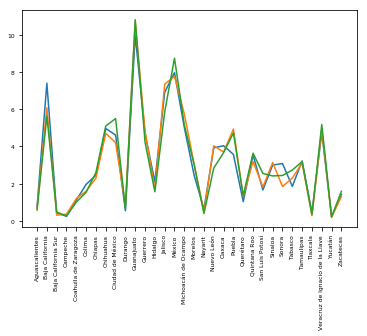

In [39]:
# pctg de homicidios de la entidad respecto al resto del país
def pctg_homicidios(entidad):
    homi = deli[(deli['Entidad'] == entidad) & (deli['Tipo de delito'] == 'Homicidio')]
    return homi[meses].sum()/suma*100

x = deli['Entidad'].unique()
y = [pctg_homicidios(entidad) for entidad in x]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)
plt.xticks(rotation=90)
ax.tick_params(labelsize=6)
plt.show()

In [40]:
# indices con todos los meses con la fecha del último dia de cada mes
último_mes = 3  # último mes registrado, marzo 2019
idx = pd.date_range('1/1/2015', end=str(último_mes+1)+'/1/2019', freq='M')

In [41]:
res = pd.DataFrame(index=idx)
res

""
2015-01-31
2015-02-28
2015-03-31
2015-04-30
2015-05-31
2015-06-30
2015-07-31
2015-08-31
2015-09-30
2015-10-31


In [ ]:
# TARDADO!!! ... genera la lista de sumas de homicidios por año y por mes
r = []
for año in range(2015, 2020):
    deli = pd.read_excel('delitos_data/Municipal-Delitos-2015-2019/'+
                         str(año)+".xlsx")
    homicidios = deli[deli['Tipo de delito']=='Homicidio']
    suma = homicidios[meses].sum()
    r.extend(list(suma))
r

In [36]:
# crea la tabla de Pandas con los índices y valores obtenidos
homicidios = pd.DataFrame(r[:len(idx)], index=idx, columns=['Homicidios'])
homicidios

,Homicidios
2015-01-31,2532.0
2015-02-28,2523.0
2015-03-31,2496.0
2015-04-30,2553.0
2015-05-31,2762.0
2015-06-30,2471.0
2015-07-31,2587.0
2015-08-31,2777.0
2015-09-30,2548.0
2015-10-31,2619.0


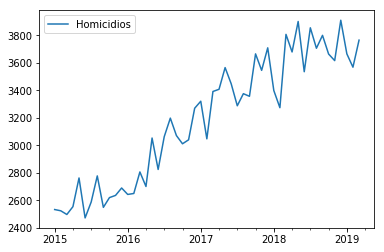

In [37]:
homicidios.plot()

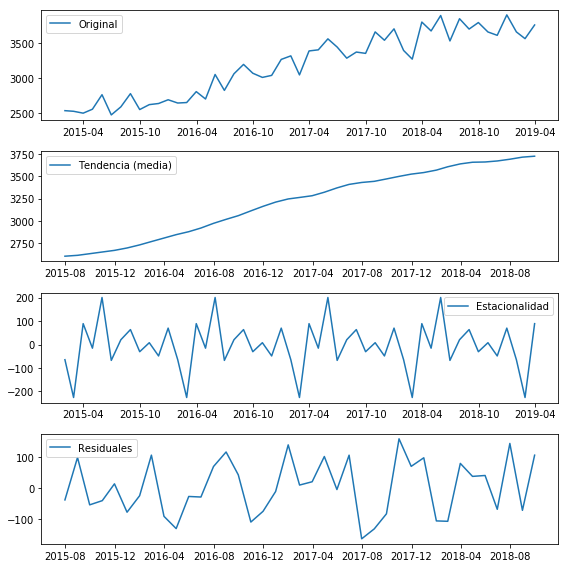

In [77]:
def analisis_estacional(original, freq=12):
    from statsmodels.tsa.seasonal import seasonal_decompose
    desc = seasonal_decompose(original, freq=freq)

    trend = desc.trend
    seasonal = desc.seasonal
    residual = desc.resid
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(original, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Tendencia (media)')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Estacionalidad')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuales')
    plt.legend(loc='best')
    plt.tight_layout()

analisis_estacional(homicidios)

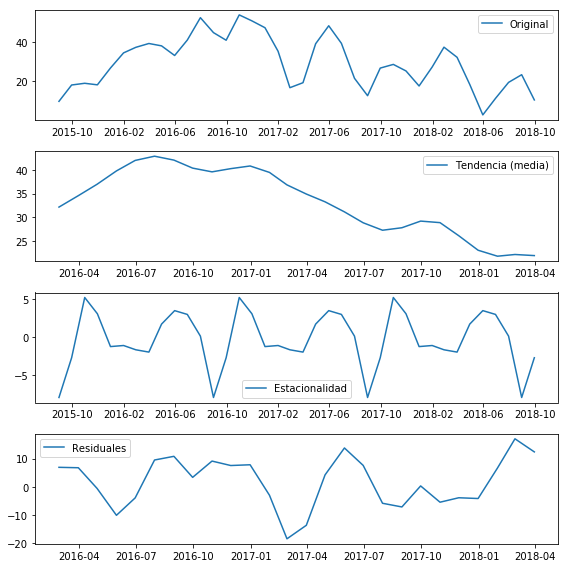

In [78]:
trend.dropna(inplace=True)
aceleración = trend-trend.shift(1)
analisis_estacional(aceleración.dropna())